In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv', encoding='utf-8')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
sales_by_platform_region = df.groupby(['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])['Global_Sales'].sum().reset_index()

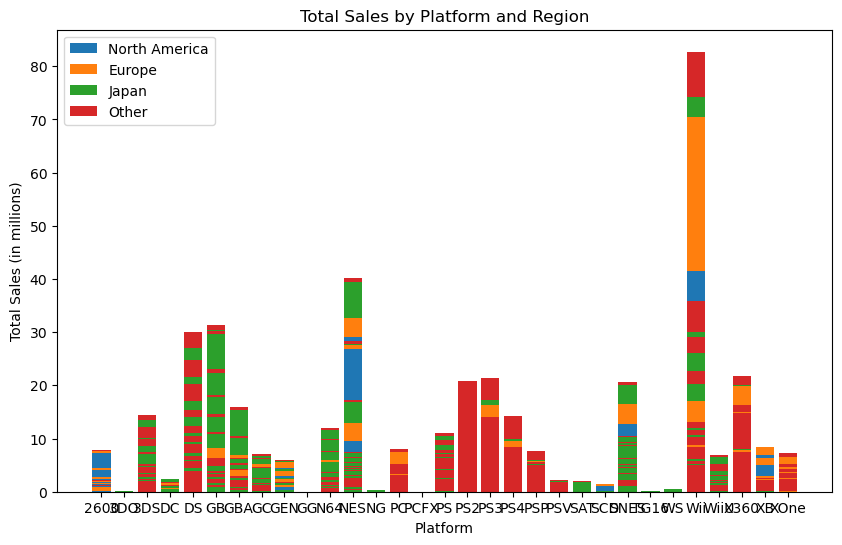

In [3]:
plt.figure(figsize=(10, 6))

plt.bar(sales_by_platform_region['Platform'], sales_by_platform_region['NA_Sales'], label='North America')
plt.bar(sales_by_platform_region['Platform'], sales_by_platform_region['EU_Sales'], bottom=sales_by_platform_region['NA_Sales'], label='Europe')
plt.bar(sales_by_platform_region['Platform'], sales_by_platform_region['JP_Sales'], bottom=sales_by_platform_region['NA_Sales'] + sales_by_platform_region['EU_Sales'], label='Japan')
plt.bar(sales_by_platform_region['Platform'], sales_by_platform_region['Other_Sales'], bottom=sales_by_platform_region['NA_Sales'] + sales_by_platform_region['EU_Sales'] + sales_by_platform_region['JP_Sales'], label='Other')

plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales by Platform and Region')
plt.legend()

plt.show()


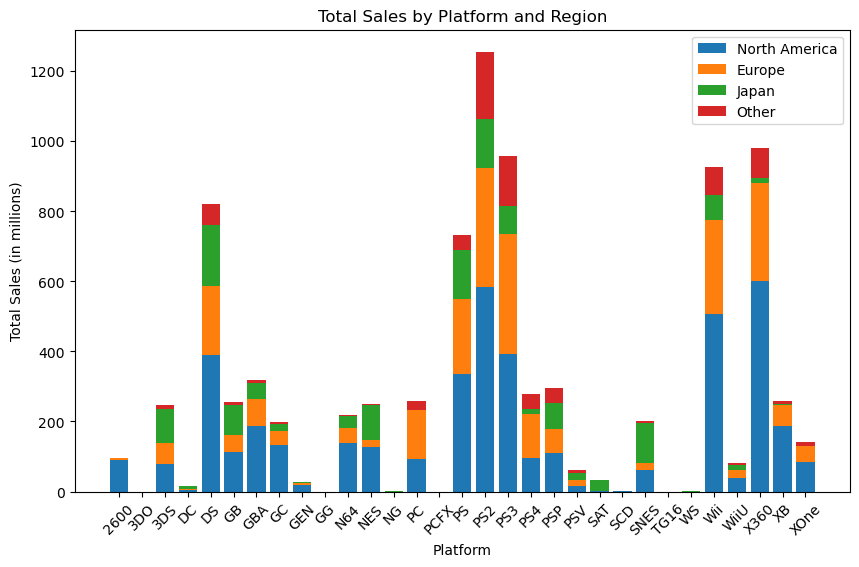

In [4]:
# group the data by platform and region and calculate the total sales for each region
sales_by_platform_region = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sales_by_platform_region['Platform'], sales_by_platform_region['NA_Sales'], label='North America')
ax.bar(sales_by_platform_region['Platform'], sales_by_platform_region['EU_Sales'], bottom=sales_by_platform_region['NA_Sales'], label='Europe')
ax.bar(sales_by_platform_region['Platform'], sales_by_platform_region['JP_Sales'], bottom=sales_by_platform_region['NA_Sales'] + sales_by_platform_region['EU_Sales'], label='Japan')
ax.bar(sales_by_platform_region['Platform'], sales_by_platform_region['Other_Sales'], bottom=sales_by_platform_region['NA_Sales'] + sales_by_platform_region['EU_Sales'] + sales_by_platform_region['JP_Sales'], label='Other')

# set the x-axis tick labels to evenly spaced values
xticks = np.linspace(0, len(sales_by_platform_region['Platform'])-1, len(sales_by_platform_region['Platform']))
ax.set_xticks(xticks)
ax.set_xticklabels(sales_by_platform_region['Platform'], rotation = 45)


# set the axis labels and title
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales (in millions)')
ax.set_title('Total Sales by Platform and Region')

# add a legend
ax.legend()

plt.show()


# Identify Sales Trends

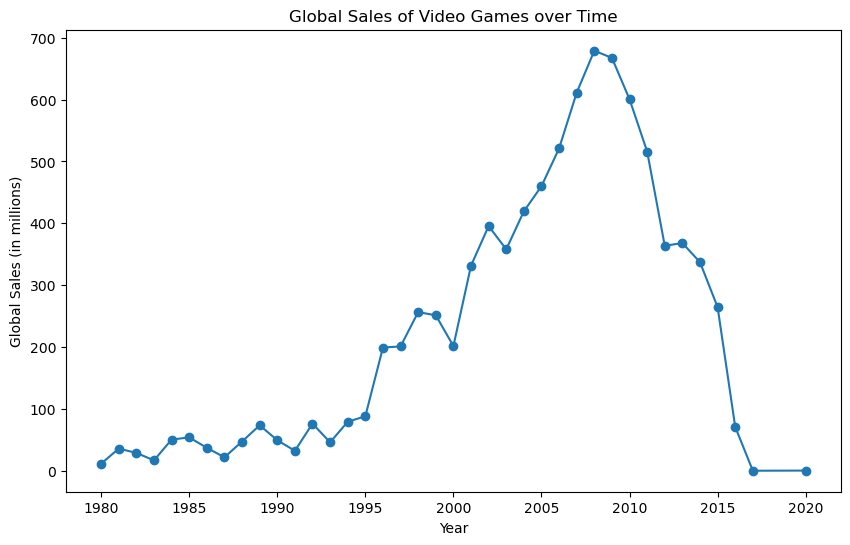

In [5]:
# group the data by year and sum the sales
sales_by_year = df.groupby('Year')[['Global_Sales']].sum().reset_index()

# create a line chart
plt.figure(figsize=(10, 6))

plt.plot(sales_by_year['Year'], sales_by_year['Global_Sales'], marker='o')

plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales of Video Games over Time')
plt.plot(color='purple')
plt.show()

Predicting

Ok, so now here's the fun! We're gonna to predict the number of sales over time. 

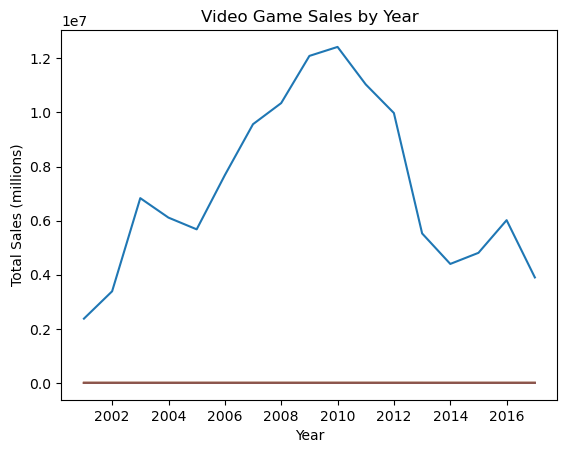

In [6]:

# Load the data
df = pd.read_csv('vgsales.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set the 'Year' column as the index
df.set_index('Year', inplace=True)

# Filter for relevant time periods
df = df.loc['2000':'2016']

# Aggregate sales by year
yearly_sales = df.resample('Y').sum()

# Plot the time series
plt.plot(yearly_sales)
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.title('Video Game Sales by Year')
plt.show()

We are going to preprocess the data to make it suitable for modeling. This involves filling missing values, removing outliers, and transforming the data to a stationary time series if necessary.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
df = pd.read_csv('vgsales.csv')

We'll start by dealing with the missing values in the Year column. We can take a look at the number of missing values using the isna() and sum() methods:


In [9]:
df['Year'].isna().sum()

271

In [10]:
df['Publisher'].isna().sum()

58

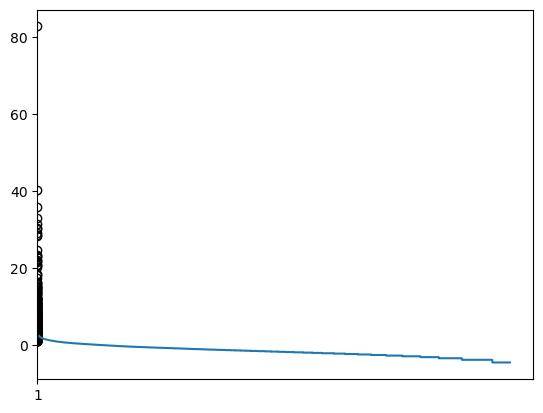

In [11]:
plt.boxplot(df['Global_Sales'])
df = df[df['Global_Sales'] <= 10]
df['Global_Sales_Log'] = np.log(df['Global_Sales'])
plt.plot(df['Global_Sales_Log'])


# Split the Data
using the video_game_sales, I'm going to split the data into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance. 

In [12]:
df.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Log
62,False,False,False,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False,False,False,False
64,False,False,False,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False,False,False,False
66,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.fillna(df.mean(), inplace = True) 
print(df.columns)


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Global_Sales_Log'],
      dtype='object')


/var/folders/cn/c3f8_yx16h95n4cz8thbh6k00000gn/T/ipykernel_62620/1779238718.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [14]:


# read the data from the CSV file
df_train = pd.read_csv('vgsales.csv')
df.head(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Log
62,63,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.88,2.290513
63,64,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87,2.289500
64,65,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82,2.284421
65,66,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76,2.278292
66,67,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,2.274186
...,...,...,...,...,...,...,...,...,...,...,...,...
157,158,Super Smash Bros.,N64,1999.0,Fighting,Nintendo,2.95,0.60,1.97,0.04,5.55,1.713798
158,159,Assassin's Creed,X360,2007.0,Adventure,Ubisoft,3.28,1.65,0.07,0.55,5.55,1.713798
159,160,Batman: Arkham City,PS3,2011.0,Action,Warner Bros. Interactive Entertainment,2.70,1.91,0.11,0.80,5.53,1.710188
160,161,Forza Motorsport 3,X360,2009.0,Racing,Microsoft Game Studios,2.99,1.92,0.10,0.51,5.51,1.706565


In [15]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# read the data from the CSV file
df_train = pd.read_csv('vgsales.csv')

# drop non-numeric columns
df_train.drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1, inplace=True)

# fill missing values with the mean
df_train.fillna(df_train.mean(), inplace=True)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['Global_Sales'], axis=1),
                                                    df_train['Global_Sales'], test_size=0.2, random_state=0)

# convert to float
X_train = X_train.astype('float64')

# impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# fit the model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# make predictions
y_pred = regressor.predict(X_test)

# calculate the accuracy of the model
accuracy = regressor.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00


An accuracy of 1.00 means that the model was able to correctly predict all the values in the test dataset. In other words, the model has a perfect performance on the test dataset, which may indicate overfitting, especially if the training dataset was significantly larger than the test dataset. It is important to validate the model on multiple test sets and use other performance metrics such as precision, recall, and F1-score to get a better understanding of the model's performance.

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils

# Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: Unknown label type: 'continuous'